*Save and Load results from here*

In [ ]:
def record_Results(key,results):
  import json
  from google.colab import drive


  drive.mount('/content/drive')

  dictionary ={
      key : results
  } 
  json_object = json.dumps(dictionary)

  FILE_PATH = "/content/drive/My Drive/Results/"+"Mnist_Experiment_4A"+str(key)+".json"
  f = open(FILE_PATH, "w")
  f.write(json_object)
  print("recorded")

def Get_Results(file):
  import json
  from google.colab import drive

  drive.mount('/content/drive')

  FILE_PATH = "/content/drive/My Drive/Results/"+"Mnist_Experiment_4A"+str(file)+".json"
  f = open(FILE_PATH, "r")
  json_object = json.load(f)
  
  return json_object

# **BS increasing with each epoch and hence the LR**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Starting GPU**

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.115046150000012
GPU (s):
0.03932099099998254
GPU speedup over CPU: 79x


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

sh = train_images.shape
sh

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [ ]:
def simple_model():
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  
  return model

In [ ]:
def Plotter(acc,val_acc,loss,val_loss,l_r):
  
  plt.plot(acc, label='accuracy')
  plt.plot(val_acc, label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()


  plt.plot(loss, label='loss')
  plt.plot(val_loss, label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.legend(loc='lower right')
  plt.show()

  plt.plot(l_r, label='Learning Rate')
  # plt.plot(val_loss, label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('LR')
  plt.legend(loc='lower right')
  plt.show()

In [ ]:
model = simple_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**Normal default fit** : LR and Batch Size default

In [ ]:
history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels))

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4398 - accuracy: 0.8751 - val_loss: 0.1387 - val_accuracy: 0.9603
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1271 - accuracy: 0.9634 - val_loss: 0.0980 - val_accuracy: 0.9691
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0791 - accuracy: 0.9756 - val_loss: 0.0820 - val_accuracy: 0.9730
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0601 - accuracy: 0.9807 - val_loss: 0.0877 - val_accuracy: 0.9731
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0430 - accuracy: 0.9870 - val_loss: 0.0716 - val_accuracy: 0.9781
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0338 - accuracy: 0.9900 - val_loss: 0.0747 - val_accuracy: 0.9776
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0257 - accuracy: 0.9924 - val_loss: 0.0825 - val_ac

In [ ]:
acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']

In [ ]:
#Save these values in your jsonm
record_Results("acc_1",acc_1)
record_Results("val_acc_1",val_acc_1)

Mounted at /content/drive
recorded
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
recorded


In [ ]:
#Get the saved results
acc_1 = Get_Results("acc_1")["acc_1"]
val_acc_1 = Get_Results("val_acc_1")["val_acc_1"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


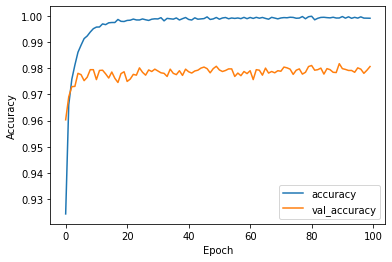

313/313 - 0s - loss: 0.2187 - accuracy: 0.9807


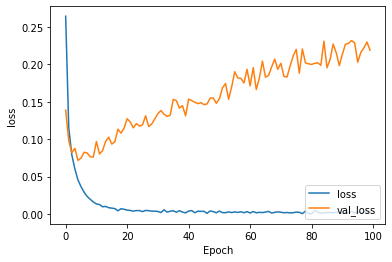

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

**Test for LR**

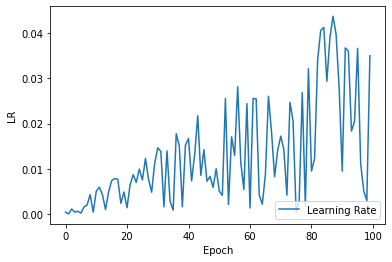

In [ ]:
from random import random,randint,randrange,uniform
lr = []
epoo=100
for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

  # print(z,(batch_size)/((z+1)**(3/2))/80)
  


  # if (z%2 == 0):
  LR = random() * batch_size/10000
  lr.append(LR)
  # else:
  #   LR = random() * z/10000
  #   lr.append(LR)

# lr = lr[::-1] 
lord_LR = lr
# print(min(lr))


plt.plot(lr, label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('LR')
plt.legend(loc='lower right')
plt.show()


# lr = []
# epoo=150
# for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

#   # print(z,(batch_size)/((z+1)**(3/2))/80)
  

#   LR = random() * z/10000
#   # LR=LR/8
#   lr.append(LR)

# plt.plot(lr, label='Learning Rate')
# plt.xlabel('Epoch')
# plt.ylabel('LR')
# plt.legend(loc='lower right')
# plt.show()

In [ ]:
model = simple_model()

from keras.callbacks import LearningRateScheduler

LR = 0.01
epoch = 1
batch_size = 100

val_acc = []
acc = []
val_loss = []
loss = []
l_r = []

num = 0

x = 0
# kr = lr
for z,batch_size in zip(range(1,epoo),range(5,10000,5)):

  # if (z%2 == 0):
  LR = random() * batch_size/10000
  lr.append(LR)
  # else:
    # LR = random() * z/10000
  # lr.append(LR)

  print("\n\nepoch {z}, Learning Rate {LR}, Batch Size  {batch_size} "
                    .format(z=z,LR=LR,batch_size=batch_size))

  def set_LR(epoch,lr):
    global LR
    global l_r
    global x
    global lord_LR 

    LR=lord_LR[x]
    x+=1
    if(LR>0.009):
      LR = 0.009
    l_r.append(LR)
    return LR

  call = [ LearningRateScheduler(set_LR,verbose=1) ]

  history = model.fit(
            train_images, train_labels, 
            validation_data=(test_images, test_labels),
            epochs=epoch,
            batch_size=batch_size,
            callbacks=call
            )



  acc.append(history.history['accuracy'])
  val_acc.append(history.history['val_accuracy'])
  loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])

  # if(num >= 50 ):
  #   x = input("type anything if you want to continue >  ")
  #   num = 0
  # num += 1




epoch 1, Learning Rate 6.350175562446336e-05, Batch Size  5 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0004366065462528211.
12000/12000 [==============================] - 21s 2ms/step - loss: 0.3956 - accuracy: 0.8864 - val_loss: 0.1283 - val_accuracy: 0.9603


epoch 2, Learning Rate 0.0008333910866088531, Batch Size  10 

Epoch 00001: LearningRateScheduler reducing learning rate to 5.567461844508492e-05.
6000/6000 [==============================] - 13s 2ms/step - loss: 0.0980 - accuracy: 0.9714 - val_loss: 0.1005 - val_accuracy: 0.9705


epoch 3, Learning Rate 0.0008476872241069604, Batch Size  15 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001141772862033512.
4000/4000 [==============================] - 10s 2ms/step - loss: 0.1059 - accuracy: 0.9685 - val_loss: 0.0852 - val_accuracy: 0.9730


epoch 4, Learning Rate 0.00179541646166697, Batch Size  20 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0004413191174565796.
3000

In [ ]:
acc_2 = acc
val_acc_2 = val_acc

In [ ]:
#Save these values in your jsonm
record_Results("acc_2",acc_2)
record_Results("val_acc_2",val_acc_2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
recorded
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
recorded


In [ ]:
#Get the saved results
acc_2 = Get_Results("acc_2")["acc_2"]
val_acc_2 = Get_Results("val_acc_2")["val_acc_2"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


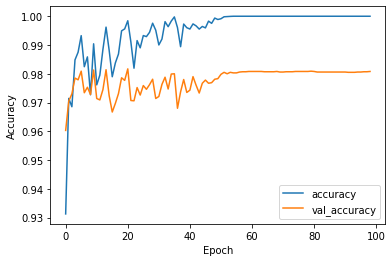

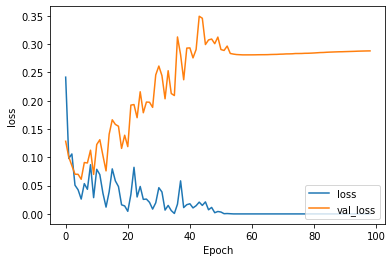

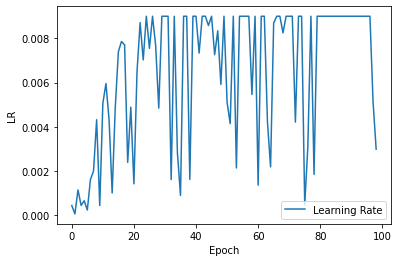

In [ ]:
Plotter(acc,val_acc,loss,val_loss,l_r)

**Keeping batch size constant**

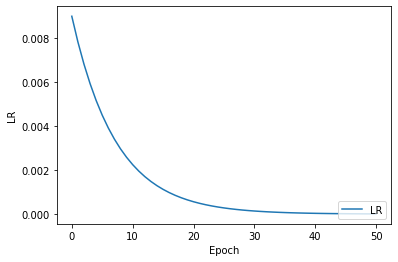

In [ ]:
initial_learning_rate = 0.009
decay_steps=5
decay_rate=0.5
LR = []
for i in range(51):
  lr = initial_learning_rate * decay_rate **(i / decay_steps)
  LR.append(lr)
plt.plot(LR, label='LR')
# plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('LR')
plt.legend(loc='lower right')
plt.show()

In [ ]:

model = simple_model()

from keras.callbacks import LearningRateScheduler

LR = 0.01
# epoch = 1
batch_size = 100

val_acc = []
acc = []
val_loss = []
loss = []
l_r = []
for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

  LR = (batch_size)/(((z+1)**(3/2))*80)
  LR=LR/8

  print("\n\nepoch {z}, Learning Rate {LR}, Batch Size  {batch_size} "
                    .format(z=z,LR=LR,batch_size=batch_size))

  def set_LR(epoch,lr):
    global LR
    global l_r
    l_r.append(LR)
    return LR

  call = [ LearningRateScheduler(set_LR,verbose=1) ]

  history = model.fit(
            train_images, train_labels, 
            validation_data=(test_images, test_labels),
            epochs=epoch,
            # batch_size=batch_size,
            callbacks=call
            )



  acc.append(history.history['accuracy'])
  val_acc.append(history.history['val_accuracy'])
  loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])



epoch 1, Learning Rate 0.002762135864009951, Batch Size  5 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.002762135864009951.
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3421 - accuracy: 0.8995 - val_loss: 0.1247 - val_accuracy: 0.9616


epoch 2, Learning Rate 0.003007032652029301, Batch Size  10 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003007032652029301.
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1026 - accuracy: 0.9687 - val_loss: 0.0860 - val_accuracy: 0.9720


epoch 3, Learning Rate 0.0029296875, Batch Size  15 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0029296875.
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0726 - accuracy: 0.9768 - val_loss: 0.1095 - val_accuracy: 0.9686


epoch 4, Learning Rate 0.002795084971874737, Batch Size  20 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.002795084971874737.
1875/1875 [===================

In [ ]:
acc_3 = acc
val_acc_3 = val_acc

In [ ]:
#Save these values in your jsonm
record_Results("acc_3",acc_3)
record_Results("val_acc_3",val_acc_3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
recorded
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
recorded


In [ ]:
#Get the saved results
acc_3 = Get_Results("acc_3")["acc_3"]
val_acc_3 = Get_Results("val_acc_3")["val_acc_3"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


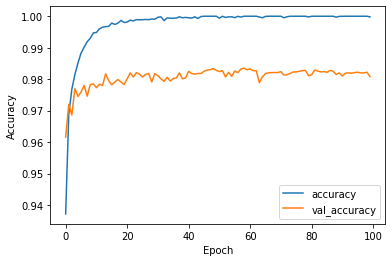

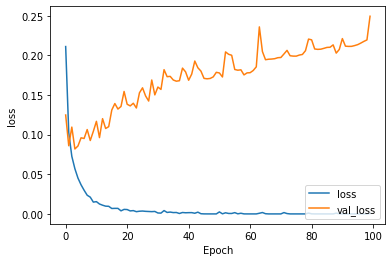

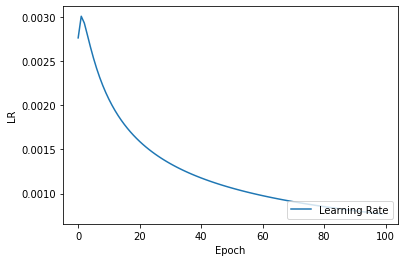

In [ ]:
Plotter(acc,val_acc,loss,val_loss,l_r)

**LR constant**

In [ ]:
model = simple_model()

from keras.callbacks import LearningRateScheduler

LR = 0.01
epoch = 1
batch_size = 100

val_acc = []
acc = []
val_loss = []
loss = []
l_r = []
for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

  LR = (batch_size)/(((z+1)**(3/2))*80)
  LR=LR/8

  print("\n\nepoch {z}, Learning Rate {LR}, Batch Size  {batch_size} "
                    .format(z=z,LR=LR,batch_size=batch_size))

  def set_LR(epoch,lr):
    global LR
    global l_r
    l_r.append(LR)
    return LR

  call = [ LearningRateScheduler(set_LR,verbose=1) ]

  history = model.fit(
            train_images, train_labels, 
            validation_data=(test_images, test_labels),
            epochs=epoch,
            batch_size=batch_size,
            # callbacks=call
            )



  acc.append(history.history['accuracy'])
  val_acc.append(history.history['val_accuracy'])
  loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])



epoch 1, Learning Rate 0.002762135864009951, Batch Size  5 
12000/12000 [==============================] - 21s 2ms/step - loss: 0.3201 - accuracy: 0.9069 - val_loss: 0.1205 - val_accuracy: 0.9634


epoch 2, Learning Rate 0.003007032652029301, Batch Size  10 
6000/6000 [==============================] - 13s 2ms/step - loss: 0.0779 - accuracy: 0.9765 - val_loss: 0.0719 - val_accuracy: 0.9774


epoch 3, Learning Rate 0.0029296875, Batch Size  15 
4000/4000 [==============================] - 10s 2ms/step - loss: 0.0506 - accuracy: 0.9843 - val_loss: 0.0708 - val_accuracy: 0.9786


epoch 4, Learning Rate 0.002795084971874737, Batch Size  20 
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0341 - accuracy: 0.9899 - val_loss: 0.0673 - val_accuracy: 0.9809


epoch 5, Learning Rate 0.0026578664743741078, Batch Size  25 
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0255 - accuracy: 0.9923 - val_loss: 0.0736 - val_accuracy: 0.9781


epoch 6, Learning Rat

In [ ]:
acc_4 = acc
val_acc_4 = val_acc

In [ ]:
#Save these values in your jsonm
record_Results("acc_4",acc_4)
record_Results("val_acc_4",val_acc_4)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
recorded
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
recorded


In [ ]:
#Get the saved results
acc_4 = Get_Results("acc_4")["acc_4"]
val_acc_4 = Get_Results("val_acc_4")["val_acc_4"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


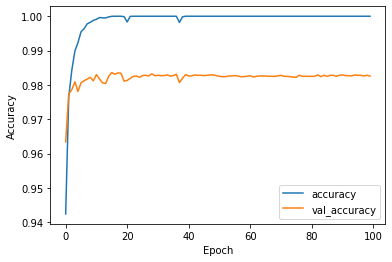

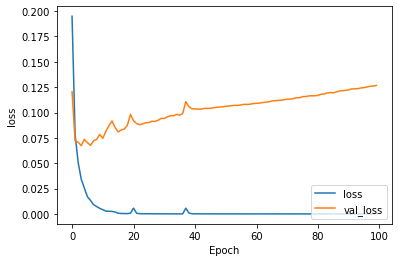

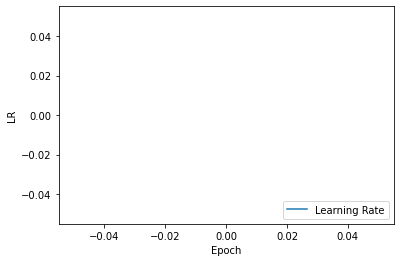

In [ ]:
Plotter(acc,val_acc,loss,val_loss,l_r)

**Plotting all of them**

---

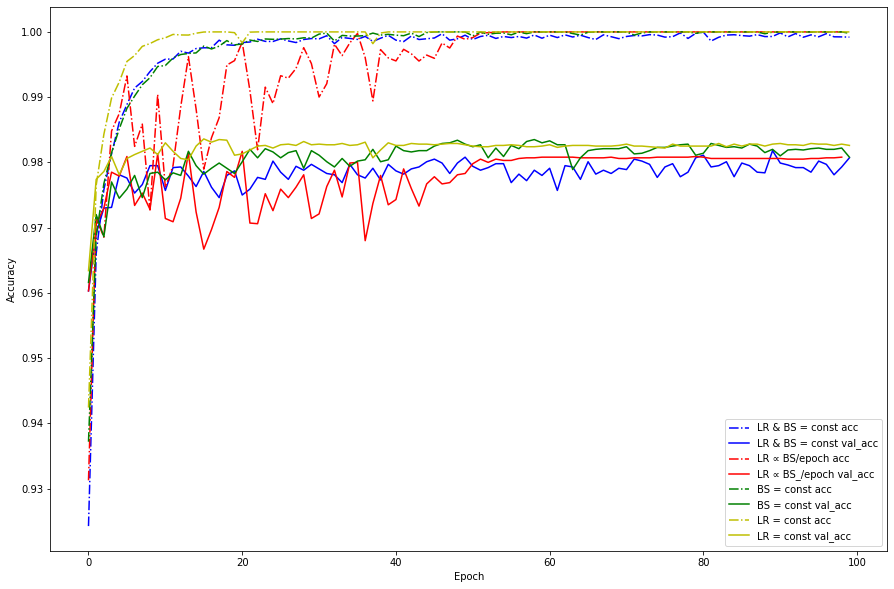

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(acc_1, label='LR & BS = const acc',ls='-.',c='b')
plt.plot(val_acc_1, label = 'LR & BS = const val_acc',c='b')
plt.plot(acc_2, label='LR ∝ BS/epoch acc',ls='-.',c='r')
plt.plot(val_acc_2, label = 'LR ∝ BS_/epoch val_acc',c='r')
plt.plot(acc_3, label='BS = const acc',ls='-.',c='g')
plt.plot(val_acc_3, label = 'BS = const val_acc',c='g')
plt.plot(acc_4, label='LR = const acc',ls='-.',c='y')
plt.plot(val_acc_4, label = 'LR = const val_acc',c='y')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
acc_1_dif = []
for i in range(len(acc_1)): acc_1_dif.append(acc_1[i] - val_acc_1[i]) 
acc_2_dif = []
for i in range(len(acc_2)): acc_2_dif.append(acc_2[i][0] - val_acc_2[i][0]) 
acc_3_dif = []
for i in range(len(acc_3)): acc_3_dif.append(acc_3[i][0] - val_acc_3[i][0]) 
acc_4_dif = []
for i in range(len(acc_4)): acc_4_dif.append(acc_4[i][0] - val_acc_4[i][0]) 

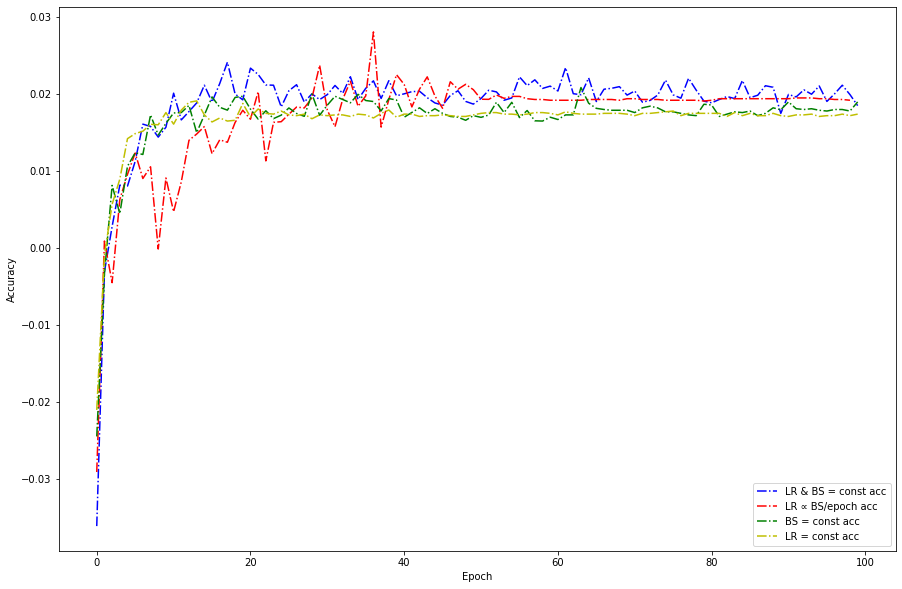

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(acc_1_dif, label='LR & BS = const acc',ls='-.',c='b')
# plt.plot(val_acc_1, label = 'LR & BS = const val_acc',c='b')
plt.plot(acc_2_dif, label='LR ∝ BS/epoch acc',ls='-.',c='r')
# plt.plot(val_acc_2, label = 'LR ∝ BS_/epoch val_acc',c='r')
plt.plot(acc_3_dif, label='BS = const acc',ls='-.',c='g')
# plt.plot(val_acc_3, label = 'BS = const val_acc',c='g')
plt.plot(acc_4_dif, label='LR = const acc',ls='-.',c='y')
# plt.plot(val_acc_4, label = 'LR = const val_acc',c='y')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()